In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Exploratory data analysis

#### Data composition

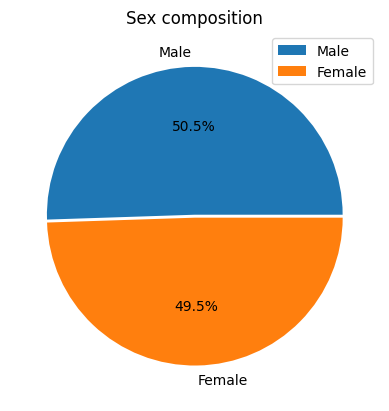

In [5]:
female=df.loc[df['sex']=='female'].count()[0]
male=df.loc[df['sex']=='male'].count()[0]
pieData=[male,female]
plt.pie(pieData,autopct='%1.1f%%',labels=['Male','Female'],explode=[0.01,0.01])
plt.title('Sex composition')
plt.legend()
plt.show()

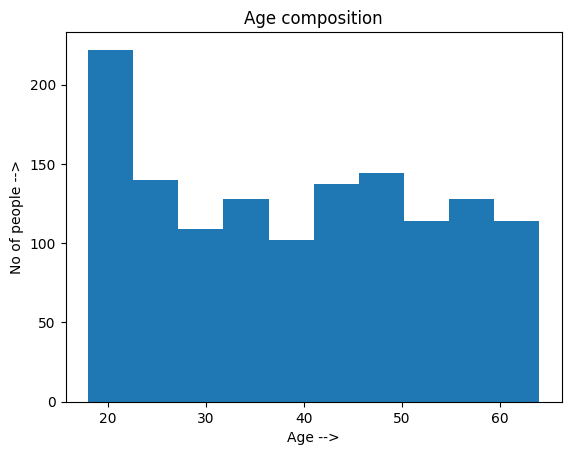

In [6]:
plt.hist(df['age'])
plt.xlabel('Age -->')
plt.ylabel('No of people -->')
plt.title('Age composition')
plt.show()

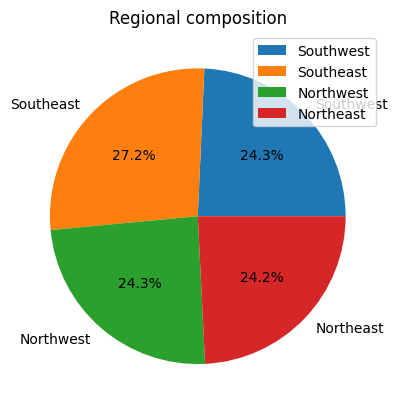

In [7]:
sw = df[df['region']=='southwest'].count()[0]
se = df[df['region']=='southeast'].count()[0]
nw = df[df['region']=='northwest'].count()[0]
ne = df[df['region']=='northeast'].count()[0]
regionData=[sw,se,nw,ne]
regionLabel=['Southwest','Southeast','Northwest','Northeast']
plt.pie(regionData,autopct="%1.1f%%",labels=regionLabel)
plt.legend()
plt.title('Regional composition')
plt.show()

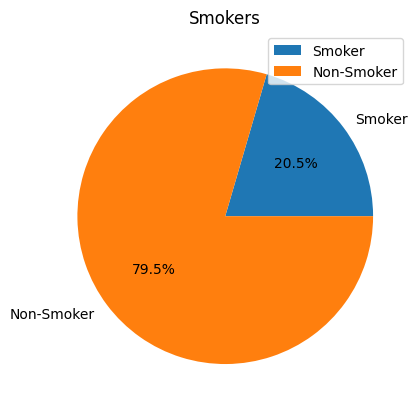

In [8]:
smokers=df[df['smoker']=='yes'].count()[0]
nonSmokers=df[df['smoker']=='no'].count()[0]
plt.pie([smokers,nonSmokers],autopct='%1.1f%%',labels=['Smoker','Non-Smoker'])
plt.legend()
plt.title('Smokers')
plt.show()

## Analysis

### BMI and Charges

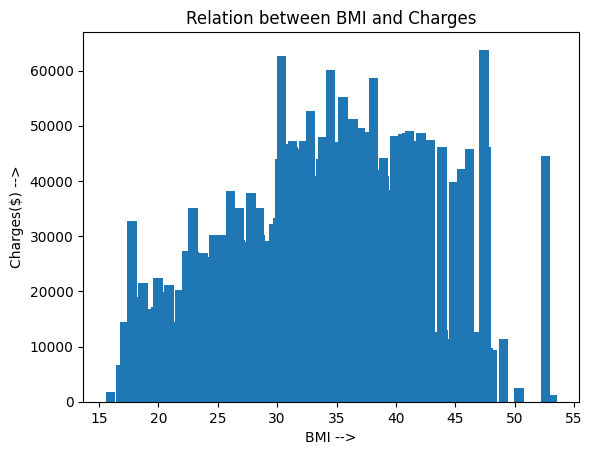

In [9]:
plt.bar(df['bmi'],df['charges'])
plt.xlabel('BMI -->')
plt.ylabel('Charges($) -->')
plt.title('Relation between BMI and Charges')
plt.show()

### Smoking and Charges

In [10]:
smokerFrame=df[df['smoker']=='yes']
nonSmokerFrame=df[df['smoker']=='no']
diff=((smokerFrame['charges'].mean()-df['charges'].mean())/df['charges'].mean()-1)
print("Difference in average insurance charges between smokers and total sample: +{:.2f}%".format(diff*100))
diff2=((smokerFrame['charges'].mean()-nonSmokerFrame['charges'].mean())/smokerFrame['charges'].mean())
print(("Difference in average insurance charges between smokers and non-smokers: +{:.2f}%".format(diff2*100)))

Difference in average insurance charges between smokers and total sample: +41.52%
Difference in average insurance charges between smokers and non-smokers: +73.68%


Smoker average: $32,050.23 
Sample average: $13,270.42 
Non-smoker average: $8,434.27


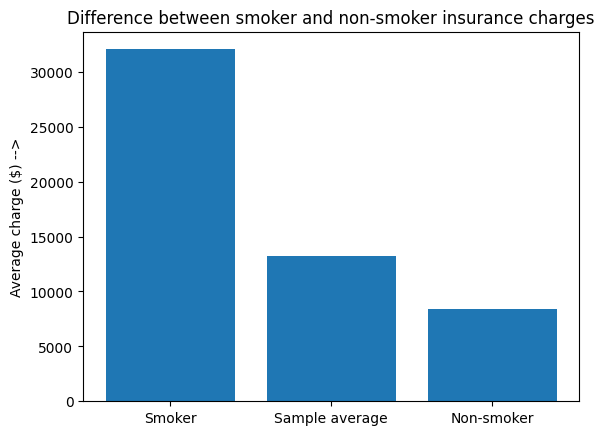

In [11]:
smoker_average=df[df['smoker']=='yes']['charges'].mean()
sample_average=df['charges'].mean()
non_smoker_average=df[df['smoker']=='no']['charges'].mean()
print("Smoker average: ${:,.2f}".format(smoker_average),
      "\nSample average: ${:,.2f}".format(sample_average),
      "\nNon-smoker average: ${:,.2f}".format(non_smoker_average))
plt.bar(['Smoker','Sample average','Non-smoker'],[smoker_average,sample_average,non_smoker_average])
plt.ylabel('Average charge ($) -->')
plt.title('Difference between smoker and non-smoker insurance charges')
plt.show()

## Region

In [12]:
southWestMean=df[df['region']=='southwest']['charges'].mean()
southEastMean=df[df['region']=='southeast']['charges'].mean()
northWestMean=df[df['region']=='northwest']['charges'].mean()
northEastMean=df[df['region']=='northeast']['charges'].mean()
countryMean=df['charges'].mean()
charges={southWestMean:'Southwest',southEastMean:'Southeast',northWestMean:'Northwest',northEastMean:'Northeast'}

charge_list=charges.keys()

charge_max=max(charges.keys())

highestRegion=max(charge_list)  

print("National average: ₹{:,.2f}".format(countryMean),
      "\nSoutheast average: ₹{:,.2f}".format(charge_max),
      "\nNortheast average: ₹{:,.2f}".format(northEastMean),
      "\nNorthwest average: ₹{:,.2f}".format(northWestMean),
      "\nSouthwest average: ₹{:,.2f}".format(southWestMean),
      "\nRegion with the highest average fees: ",charges.get(highestRegion),
      )

National average: ₹13,270.42 
Southeast average: ₹14,735.41 
Northeast average: ₹13,406.38 
Northwest average: ₹12,417.58 
Southwest average: ₹12,346.94 
Region with the highest average fees:  Southeast


| Southeast total charges: ₹5,363,689.76 | Southwest total charges: ₹4,012,754.65 
| Northwest total charges: ₹4,035,712.00 | Northeast total charges: ₹4,343,668.58



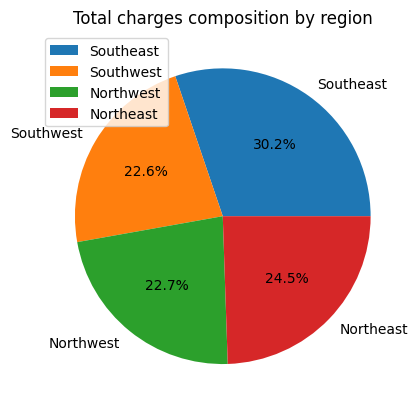

In [29]:
SE_Pie=df[df['region']=='southeast']['charges'].sum()
SW_Pie=df[df['region']=='southwest']['charges'].sum()
NW_Pie=df[df['region']=='northwest']['charges'].sum()
NE_Pie=df[df['region']=='northeast']['charges'].sum()
region_pie=[SE_Pie,SW_Pie,NW_Pie,NE_Pie]
print("| Southeast total charges: ₹{:,.2f}".format(SE_Pie),"| Southwest total charges: ₹{:,.2f}".format(SW_Pie),
      "\n| Northwest total charges: ₹{:,.2f}".format(NW_Pie),"| Northeast total charges: ₹{:,.2f}\n".format(NE_Pie))
plt.pie(region_pie,autopct='%1.1f%%',labels=['Southeast','Southwest','Northwest','Northeast'])
plt.legend()
plt.title('Total charges composition by region')
plt.show()

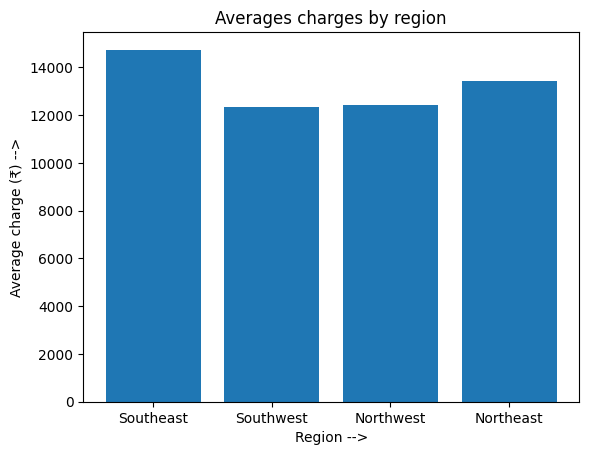

In [30]:
SE_Bar=df[df['region']=='southeast']['charges'].mean()
SW_Bar=df[df['region']=='southwest']['charges'].mean()
NW_Bar=df[df['region']=='northwest']['charges'].mean()
NE_Bar=df[df['region']=='northeast']['charges'].mean()
region_Bar=[SE_Bar,SW_Bar,NW_Bar,NE_Bar]
plt.bar(['Southeast','Southwest','Northwest','Northeast'],region_Bar)
plt.xlabel('Region -->')
plt.ylabel('Average charge (₹) -->')
plt.title('Averages charges by region')
plt.show()

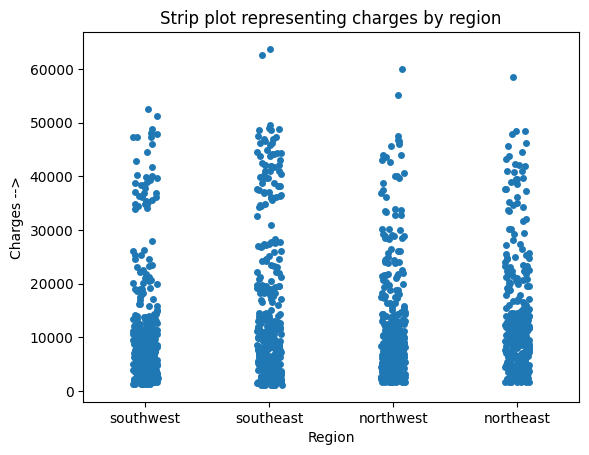

In [15]:
x=np.array(df['region'])
y=np.array(df['charges'])
data={'Region':x,'Charges':y}
plot_data=pd.DataFrame(data)
sns.stripplot(x='Region',y='Charges',data=plot_data,jitter=True)
plt.xlabel('Region')
plt.ylabel('Charges -->')
plt.title('Strip plot representing charges by region')
plt.show()


## Children

In [31]:
customers_with_children=(df[df['children']>0]['charges'].mean()/df[df['children']==0]['charges'].mean()-1)*100
print("Average charges for customers without children: ₹{:,.2f}".format(df[df['children']==0]['charges'].mean()),
      "\nAverage charges for customers with children: ₹{:,.2f}".format(df[df['children']>0]['charges'].mean()),
      "\nDifference in average charges for customers with children: +{:.2f}%".format(customers_with_children))

Average charges for customers without children: ₹12,365.98 
Average charges for customers with children: ₹13,949.94 
Difference in average charges for customers with children: +12.81%


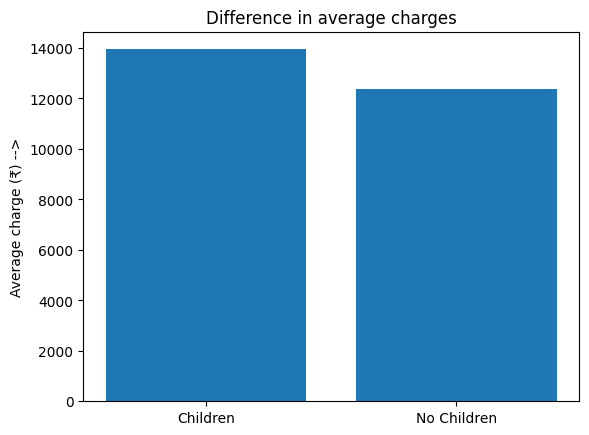

In [33]:
children=df[df['children']>0]['charges'].mean()
no_children=df[df['children']==0]['charges'].mean()
plt.bar(['Children','No Children'],[children,no_children])
plt.ylabel('Average charge (₹) -->')
plt.title('Difference in average charges')
plt.show()

In [18]:
average_parent_age=df[df['children']>0]['age'].mean()
mode_parent_age=df[df['children']>0]['age'].mode()[0]
average_nonparent_age=df[df['children']==0]['age'].mean()
print("Average age of customers with 1 or more children: {:.2f} years".format(average_parent_age),
      "\nAverage age of customers without children: {:.2f} years".format(average_nonparent_age),
      "\nMode age of customers with 1 or more children: {:.2f} years".format(mode_parent_age))

Average age of customers with 1 or more children: 39.78 years 
Average age of customers without children: 38.44 years 
Mode age of customers with 1 or more children: 47.00 years


## Smoking and BMI 

In [19]:
mean_bmi=df['bmi'].mean()
high_bmi=df[df['bmi']>mean_bmi]
high_charges=(high_bmi[high_bmi['smoker']=='yes']['charges'].mean()-df['charges'].mean())/df['charges'].mean()
print("Charges for a smoker with above average BMI are {:.2f}x higher than sample average".format(high_charges))

Charges for a smoker with above average BMI are 2.15x higher than sample average


In [20]:
print("${:,.2f}".format(df[df['sex']=='male']['charges'].mean()))

$13,956.75


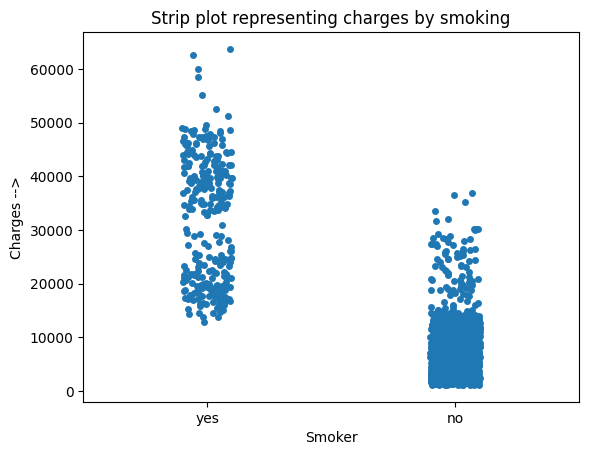

In [21]:
x=np.array(df['smoker'])
y=np.array(df['charges'])
data={'Smoker':x,'Charges':y}
plot_data=pd.DataFrame(data)
sns.stripplot(x='Smoker',y='Charges',data=plot_data,jitter=True)
plt.xlabel('Smoker')
plt.ylabel('Charges -->')
plt.title('Strip plot representing charges by smoking')
plt.show()


## Gender

In [35]:
female=df[df['sex']=='female']['charges'].mean()
male=df[df['sex']=='male']['charges'].mean()
mf=(male-female)/male*100
print("Average charges for male customer: ₹{:,.2f}".format(male),
    "\nAverage charges for female customer: ₹{:,.2f}".format(female),
    "\nDifference in average charges between female and male customers: +{:.2f}%".format(mf))

Average charges for male customer: ₹13,956.75 
Average charges for female customer: ₹12,569.58 
Difference in average charges between female and male customers: +9.94%


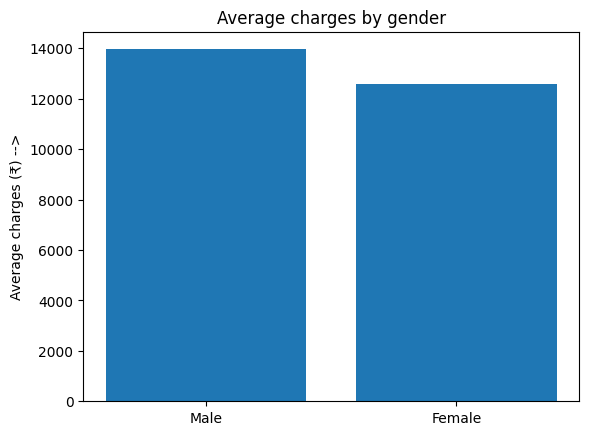

In [34]:
men=df[df['sex']=='male']['charges'].mean()
women=df[df['sex']=='female']['charges'].mean()
plt.bar(['Male','Female'],[men,women])
plt.ylabel('Average charges (₹) -->')
plt.title('Average charges by gender')
plt.show()

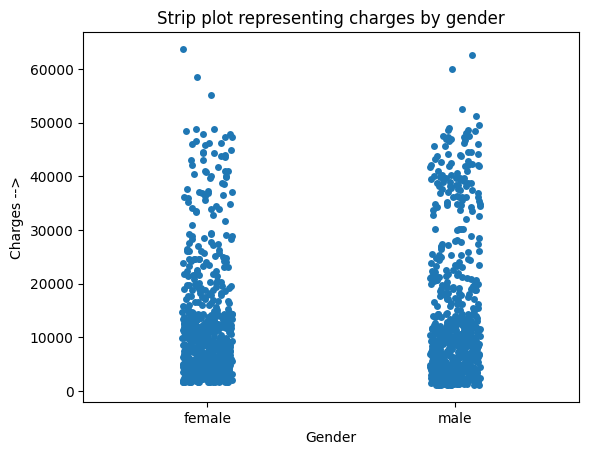

In [24]:
gender_data=np.array(df['sex'])
y=np.array(df['charges'])
plotData={'Gender':gender_data,'Charges':y}
plot_data=pd.DataFrame(plotData)
sns.stripplot(x='Gender',y='Charges',data=plot_data,jitter=True)
plt.xlabel('Gender')
plt.ylabel('Charges -->')
plt.title('Strip plot representing charges by gender')
plt.show()